https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries?datasetId=2268489&sortBy=voteCount

In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [236]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from matplotlib.pyplot import figure

In [237]:
df = pd.read_csv("ds_salaries.csv")

In [238]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [240]:
df.drop(["Unnamed: 0","salary","salary_currency"],axis=1 , inplace=True)

In [241]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


In [243]:
df["work_year"].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

In [244]:
df["experience_level"].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [245]:
df["experience_level"] = df["experience_level"].replace({"EN":0 , "MI":1  ,"SE":2 , "EX":3})
df["experience_level"] = df["experience_level"].astype(float)

In [246]:
df["employment_type"].value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

In [247]:
#df["employment_type"] = df["employment_type"].replace({"FT":2 , "PT":1  ,"CT":2 , "FL":2})

In [248]:
df["job_title"].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [249]:
top5_job_title = df['job_title'].value_counts()[:5]

<Figure size 3200x1920 with 0 Axes>

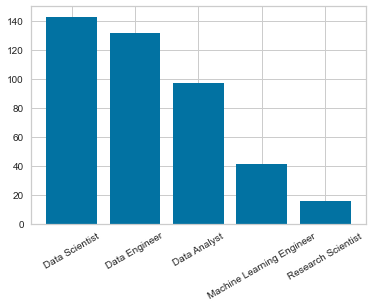

<Figure size 3200x1920 with 0 Axes>

In [250]:

fig = plt.bar(x=top5_job_title.index, height=top5_job_title.values )
plt.xticks(rotation = 30)
figure(figsize=(20, 12), dpi=160)

In [251]:
salary_job = df.groupby(['salary_in_usd','job_title']).size().reset_index()
salary_job = salary_job[-10:]

<Figure size 3200x1920 with 0 Axes>

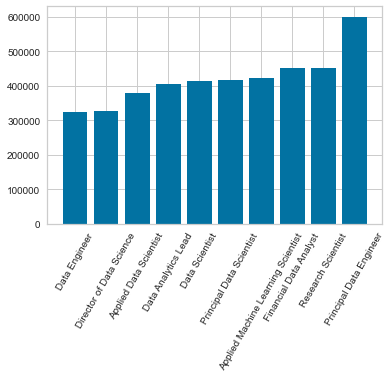

<Figure size 3200x1920 with 0 Axes>

In [252]:

fig = plt.bar(x=salary_job.job_title, height=salary_job.salary_in_usd)
plt.xticks(rotation = 60)
figure(figsize=(20, 12), dpi=160)

<AxesSubplot:xlabel='salary_in_usd'>

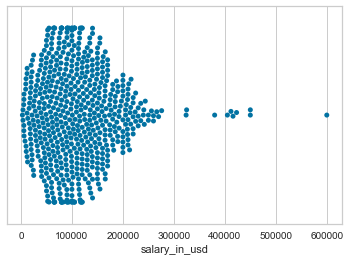

In [253]:
sns.swarmplot(df['salary_in_usd'])

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           607 non-null    int64  
 1   experience_level    607 non-null    float64
 2   employment_type     607 non-null    object 
 3   job_title           607 non-null    object 
 4   salary_in_usd       607 non-null    int64  
 5   employee_residence  607 non-null    object 
 6   remote_ratio        607 non-null    int64  
 7   company_location    607 non-null    object 
 8   company_size        607 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 42.8+ KB


In [255]:
df["employee_residence"].value_counts()

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: employee_residence, dtype: int64

In [256]:
df["remote_ratio"].value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

In [257]:
df["company_location"].value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

In [258]:
df["company_size"].value_counts()


M    326
L    198
S     83
Name: company_size, dtype: int64

In [259]:
#df["company_size"] = df["company_size"].replace({"S":1 , "M":2  ,"L":3 })

In [260]:
abs(df.corr()["salary_in_usd"]).sort_values(ascending = False)

salary_in_usd       1.000000
experience_level    0.484233
work_year           0.170493
remote_ratio        0.132122
Name: salary_in_usd, dtype: float64

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           607 non-null    int64  
 1   experience_level    607 non-null    float64
 2   employment_type     607 non-null    object 
 3   job_title           607 non-null    object 
 4   salary_in_usd       607 non-null    int64  
 5   employee_residence  607 non-null    object 
 6   remote_ratio        607 non-null    int64  
 7   company_location    607 non-null    object 
 8   company_size        607 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 42.8+ KB


In [262]:
outliers = df.quantile(.97)
df = df[(df['salary_in_usd']<outliers['salary_in_usd'])]

In [263]:
#df_model = df.drop(["company_location","employee_residence"] , axis = 1)

In [264]:
df_model = pd.get_dummies(df)

In [265]:
import numpy as np

In [266]:
from pycaret.regression import *

exp_name = setup(data = df_model , target = "salary_in_usd")

best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,27301.4456,1202568055.2446,34534.6833,0.6123,0.5279,0.5064,0.0120
huber,Huber Regressor,27455.9228,1219786374.2101,34785.2482,0.6069,0.5385,0.4838,0.0240
gbr,Gradient Boosting Regressor,27173.5952,1243152686.8777,35039.2043,0.5988,0.4936,0.4953,0.0260
ridge,Ridge Regression,27848.3151,1248443402.2122,35195.3877,0.5967,0.5483,0.4926,0.0060
rf,Random Forest Regressor,27220.0464,1284291067.1310,35657.9649,0.5870,0.4756,0.4405,0.1740
par,Passive Aggressive Regressor,28489.3138,1312262637.0108,36054.6947,0.5775,0.5200,0.5539,0.0500
omp,Orthogonal Matching Pursuit,28206.9715,1340424570.9031,36203.3496,0.5717,0.5323,0.5397,0.0080
lightgbm,Light Gradient Boosting Machine,28529.5606,1356564211.4359,36537.1130,0.5663,0.5139,0.5031,0.0090
xgboost,Extreme Gradient Boosting,28243.1520,1349836165.5502,36540.6992,0.5641,0.5439,0.4743,0.0640
ada,AdaBoost Regressor,30319.5690,1470640798.7769,38107.1500,0.5301,0.5767,0.6706,0.0160
